<a href="https://colab.research.google.com/github/LBMH-lang/CTDLGT_Python/blob/main/_M%C3%B4_h%C3%ACnh_h%E1%BB%93i_quy_tuy%E1%BA%BFn_t%C3%ADnh_E1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tải thư viện và dữ liệu

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn import datasets

In [ ]:
data = pd.read_csv("ehact_2014.csv")

In [ ]:
data.sample(10)

,tucaseid,tuactivity_n,eueatsum,euedur,euedur24
58683,20140605142265,18,-1,-1,-1
112617,20141211140574,31,-1,-1,-1
84984,20140908141529,3,1,30,30
78103,20140807142362,10,-1,-1,-1
10279,20140201140625,6,-1,-1,-1
12268,20140201141202,17,-1,-1,-1
50195,20140505142016,14,-1,-1,-1
10505,20140201140680,3,-1,-1,-1
2397,20140111132295,3,-1,-1,-1
68911,20140706142320,16,-1,-1,-1


Phân chia train – test (tỉ lệ 70% -30%)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#Drop id column

X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values
#Split arrays or matrices into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

print("\n70% train data:")
print(X_train)
print(y_train)
print("\n30% test data:")
print(X_test)
print(y_test)

#Create KNN Classifier
#Number of neighbors to use by default for kneighbors queries.
knn = KNeighborsClassifier(n_neighbors=5)
#Train the model using the training sets
knn.fit(X_train, y_train)
#Predict the response for test dataset
print("Response for test dataset:")
y_pred = knn.predict(X_test)
print(y_pred)


70% train data:
[[20140112131749             31             -1             -1]
 [20140505140687             25             -1             -1]
 [20140807140541             15             -1             -1]
 ...
 [20140908140754             14             -1             -1]
 [20140201140638              2             -1             -1]
 [20140504142490              2              1              2]]
[-1 -1 -1 ... -1 -1  2]

30% test data:
[[20141110140986              7             -1             -1]
 [20140301141730             11             -1             -1]
 [20140112130763              3             -1             -1]
 ...
 [20140908142349              8             -1             -1]
 [20140605141721             30             -1             -1]
 [20140807140618             11              1              2]]
[-1 -1 -1 ... -1 -1  2]
Response for test dataset:
[-1 -1 -1 ... -1 -1 -1]


Huấn luyện mô hình với train set (10-fold cross validation) Từ thư viện sklearn import KFold

In [ ]:
# evaluate a logistic regression model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.001 (0.000)


Kiểm thử mô hình với test set

In [ ]:
print("\n30% test data:")
print(X_test)
print(y_test)
#Number of neighbors to use by default for kneighbors queries.
knn = KNeighborsClassifier(n_neighbors=5)
#Train the model using the training sets
knn.fit(X_train, y_train)
#Predict the response for test dataset
print("Response for test dataset:")
y_pred = knn.predict(X_test)
print(y_pred)


30% test data:
[[20141110140986              7             -1             -1]
 [20140301141730             11             -1             -1]
 [20140112130763              3             -1             -1]
 ...
 [20140908142349              8             -1             -1]
 [20140605141721             30             -1             -1]
 [20140807140618             11              1              2]]
[-1 -1 -1 ... -1 -1  2]
Response for test dataset:
[-1 -1 -1 ... -1 -1 -1]


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[    0    22     0 ...     0     0     0]
 [    0 33637     1 ...     0     0     0]
 [    0    82     0 ...     0     0     0]
 ...
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]
 [    0     0     0 ...     0     0     0]]


Vẽ biểu đồ và trình bày kết quả

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics
 
# create linear regression object
reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(X_train, y_train)
print('Coefficients: ', reg.coef_)

Coefficients:  [-2.51832971e-17 -4.12092637e-05 -8.54439357e-04  9.99854113e-01]


Variance score: 0.9982396273212893


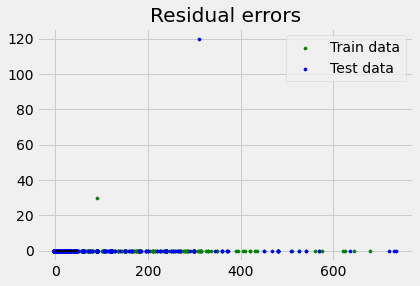

In [ ]:
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

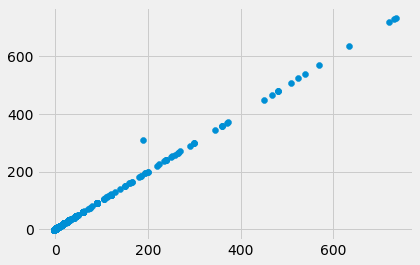

In [ ]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)

Y_pred = lm.predict(X_test)

plt.scatter(y_test, Y_pred)

In [ ]:
mse1 = sklearn.metrics.mean_squared_error(y_test, Y_pred)
print(mse1)

0.397308509847639
